#### **Home Loan Analysis**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
# `Data Ingestion`

In [6]:
url1 = r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
url2 = r"https://raw.githubusercontent.com/kenstare/Practice_datasets/master/home_loan_test.csv"
train_data = pd.read_csv(url1)



In [ ]:
# checking the first five rows
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# checking the datasets informations

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# checking the column headers 

train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# checking the shape of the dataset
train_data.shape

(614, 13)

In [11]:
# checking the data types in each columns
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# Now lets make a copy of our data
copied = train_data.copy()

# DATA CLEANING

In [15]:
# lets check for missing values
copied.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# lets check for duplicated data
copied.duplicated().sum()

np.int64(0)

In [ ]:
print("\nMissing Values:\n",df.isna().sum())


Missing Values:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


It can be seen that gender has 11 missing values,dependants has 10 missing values, self-employed column has 23 missing values , loan amount has 5 missing values, loan amount term has 6 missing values and credit history has 29 missing values. Each will be handled appropriately.

In [ ]:
# Let's check the duplicates in our dataset
print(df.duplicated())

print("\nDuplicates:",df.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
362    False
363    False
364    False
365    False
366    False
Length: 367, dtype: bool

Duplicates: 0


In [17]:
copied.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
# Let's handle the gender missing rows first

copied['Gender'].value_counts()



Gender
Male      489
Female    112
Name: count, dtype: int64

In [19]:
copied['Gender'].fillna(copied['Gender'].mode()[0],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4160\2450130754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copied['Gender'].fillna(copied['Gender'].mode()[0],inplace=True)


In [20]:
copied.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Let's handle the dependents column


In [21]:
copied['Dependents'].fillna(copied['Dependents'].mode()[0],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4160\3609323860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copied['Dependents'].fillna(copied['Dependents'].mode()[0],inplace=True)


In [22]:
copied['Self_Employed'].fillna(copied['Self_Employed'].mode()[0],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4160\2493704867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copied['Self_Employed'].fillna(copied['Self_Employed'].mode()[0],inplace=True)


Let's handle the numerical data of loan amount and loan amount term

In [23]:
# Let's fill the missing values with their means
copied['LoanAmount'].fillna(copied['LoanAmount'].mean(),inplace=True)
copied['Loan_Amount_Term'].fillna(copied['Loan_Amount_Term'].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4160\2196373154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copied['LoanAmount'].fillna(copied['LoanAmount'].mean(),inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4160\2196373154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [24]:
copied.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
# The credit history is either 1 or 0, so let's fill the values with the most frequent value.

copied['Credit_History'].fillna(copied['Credit_History'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4160\4226999964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copied['Credit_History'].fillna(copied['Credit_History'].mode()[0], inplace=True)


In [26]:
# The missing values have been handled, let's clean the data a little bit more.

cols = [ 'Gender', 'Married', 'Property_Area']


for col in cols:
        if col in copied.columns:
                copied[col] = copied[col].str.strip()

In [27]:
# Let's confirm if the datatypes are accurate for the features
copied.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
# Let's check for outliers in the applicant's income column
Q1 = copied['ApplicantIncome'].quantile(0.25)
Q2 = copied['ApplicantIncome'].quantile(0.50)
Q3 = copied['ApplicantIncome'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)


# Any value lower than -430 and greater than 8354 is an outlier.

low = copied[copied['ApplicantIncome'] < -430]
high = copied[copied['ApplicantIncome'] > 8354]

Q1: 2877.5

Q2: 3812.5

Q3: 5795.0
IQR: 2917.5
lower bound : -1498.75

Upper bound : 10171.25


In [30]:
highest_AI = high['ApplicantIncome']
highest_AI

9      12841
25      9560
34     12500
54     11500
67     10750
       ...  
572    16666
592     9357
594    16120
598     9963
604    12000
Name: ApplicantIncome, Length: 75, dtype: int64

In [32]:
highest_AI.value_counts()

ApplicantIncome
10000    3
12000    2
9323     2
14583    2
8750     2
        ..
8799     1
16666    1
9357     1
16120    1
9963     1
Name: count, Length: 69, dtype: int64

# Exploratory Data Analysis (EDA)

In [33]:
copied.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
copied.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [35]:
# Let's group the numerical features

numerical_features = copied.select_dtypes(include=['float64','int64']).columns
copied[numerical_features]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [36]:
copied[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [37]:
# Let's define a function to visualize the distributions of numerical features

def numerical_features_distribution(copied, column):
    print(f"Feature: {column}")
    print("="*35)
    print(copied[column].describe().to_frame())
    print(f"\nSkewness: {copied[column].skew()}")
    print(f"Kurtosis: {copied[column].kurt()}")


    # Let's plot the histogram

    plt.subplot(1,2,1)
    sns.histplot(copied[column], kde=True, bins = 25, color = 'teal')
    plt.title(f"\nDistribution of {column}", fontsize = 15)
    plt.xlabel(column)
    plt.ylabel('Frequency')


    # Boxplot

    plt.subplot(1,2,2)
    sns.boxplot(x=copied[column], color = 'teal')
    plt.title(f"\n Boxplot of {column}", fontsize = 15)

    plt.tight_layout()
    plt.show()


    # To show the skewness

    if copied[column].skew() > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")

    elif copied[column].skew() > 0.5 :
        print(f"{column} is moderately skewed.")

    else:
        print(f"{column} is fairly symmetric")

Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.539513113994625
Kurtosis: 60.54067593369113


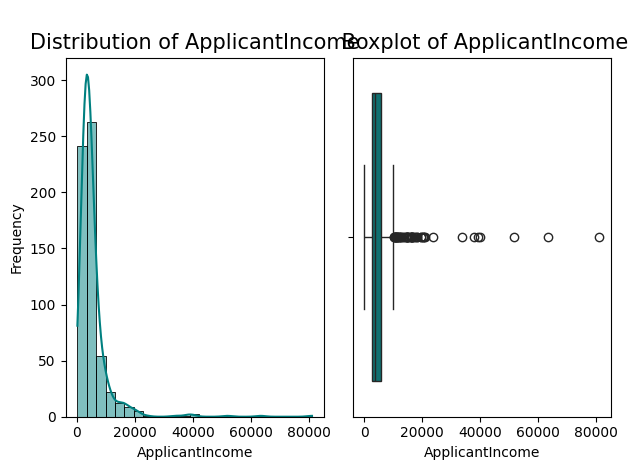


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [38]:
# 1. Applicant Income

numerical_features_distribution(copied, 'ApplicantIncome')

#### **Applicant's Income(Univariate Analysis)**



1. Highly Right-Skewed Distribution
Skewness = 8.44 indicates extreme positive skew, meaning:
Most applicants have low to moderate incomes, but
A few applicants have very high incomes that significantly stretch the distribution to the right.


2. Very High Kurtosis (103.13)
Indicates the distribution has extreme outliers and heavy tails.
A few applicants have unusually high income (like 72,529).
<br>

Recommendation:
Consider log transformation to reduce skewness and normalize the distribution.


3. Impact on Loan Approval Prediction :
Due to heavy skew and outliers, models like linear regression or KNN might perform poorly if this feature isn't transformed.
Income is a key determinant in loan eligibility, so its skewed distribution could bias the model toward high-income applicants.
<br>

Recommendation:
Bin or categorize income levels (low, medium, high) to help tree-based models or improve interpretability.
Check correlation between income and loan approval (Loan_Status) to determine predictive power.

Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.491531216657306
Kurtosis: 84.95638421103374


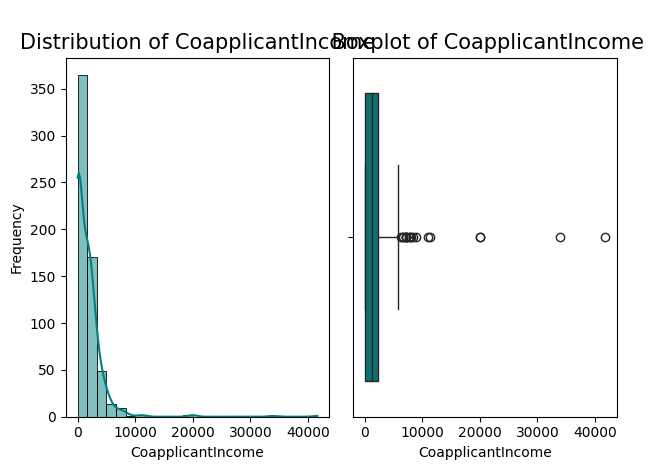


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.


In [39]:
# 2. Coapplicant Income
numerical_features_distribution(copied, 'CoapplicantIncome')

#### **COapplicant's Income(Univariate Analysis)**


1. Moderately High Positive Skewness (4.26)
Indicates a right-skewed distribution:
Most coapplicants have low income or no income.
A few coapplicants have very high income, pulling the distribution rightward.

2. Very High Kurtosis (30.19)
Indicates the presence of extreme outliers (especially toward the higher end).

3. Impact on Loan Prediction Models :
<br>
CoapplicantIncome is part of total household income and can increase loan eligibility.
However, due to the skew and outliers, its contribution may be over- or under-estimated without transformation.
<br>
Recommendation:
Combine ApplicantIncome and CoapplicantIncome into a TotalIncome feature.
Apply log transformation to the combined value to reduce skewness.


Feature: LoanAmount
       LoanAmount
count  614.000000
mean   146.412162
std     84.037468
min      9.000000
25%    100.250000
50%    129.000000
75%    164.750000
max    700.000000

Skewness: 2.726601144105299
Kurtosis: 10.896456468091559


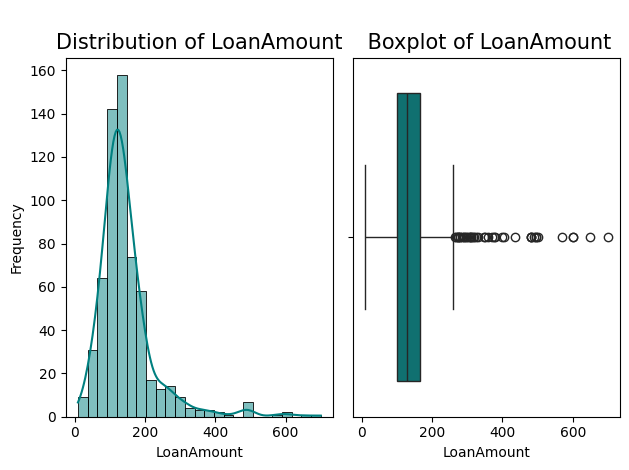


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.


In [40]:
# 3. Loan Amount


numerical_features_distribution(copied, 'LoanAmount')

#### **Loan Amount (Univariate Analysis)**

1. Moderate-to-High Positive Skew (2.24)
The distribution is right-skewed, meaning:
Most loan amounts are on the lower side, but
A few very large loans (e.g., 550) pull the mean higher than the median.

2. High Kurtosis (9.58)
Indicates heavy tails and extreme values (outliers).

3. Relationship with Income :
It's likely that LoanAmount is correlated with ApplicantIncome or TotalIncome, but the outliers might break linearity.
Before modeling, check if the correlation improves after log transformation.

Feature: Loan_Amount_Term
       Loan_Amount_Term
count        614.000000
mean         342.000000
std           64.372489
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.3896799467122745
Kurtosis: 6.897995269508927


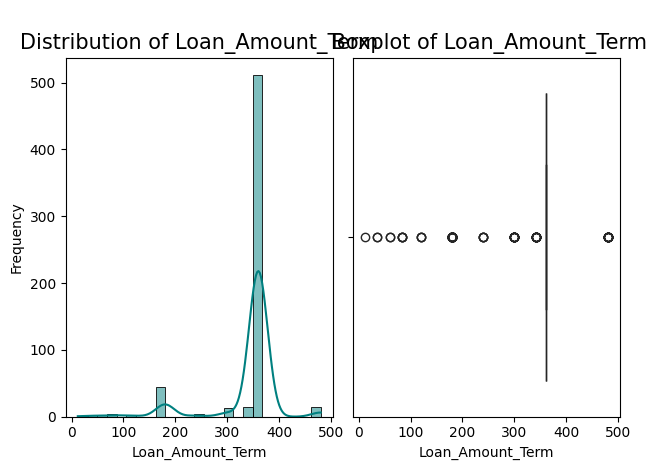

Loan_Amount_Term is fairly symmetric


In [41]:
# 4. Loan Amount Term

numerical_features_distribution(copied, 'Loan_Amount_Term')

#### **Loan Amount Term**

1. Heavily Left-Skewed Distribution (Skewness = -2.70)
Most applicants are taking longer-term loans (e.g., 360 months = 30 years).
A few applicants have chosen very short terms (e.g., 6 months, 12 months).
<br>
Insight: Most loans are long-term, which aligns with typical housing loans (20–30 years). The few short-term loans are outliers and could represent:
Special-purpose loans (not home purchase)
Data entry issues
Unique financial situations
<br>
2. High Kurtosis (8.85)
Indicates heavy tails, meaning a few terms are far from the average.
For example, terms like 6, 12, or even 480 months (40 years) are rare and add tail weight to the distribution.


Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.0219705924848985
Kurtosis: 2.095179173442731


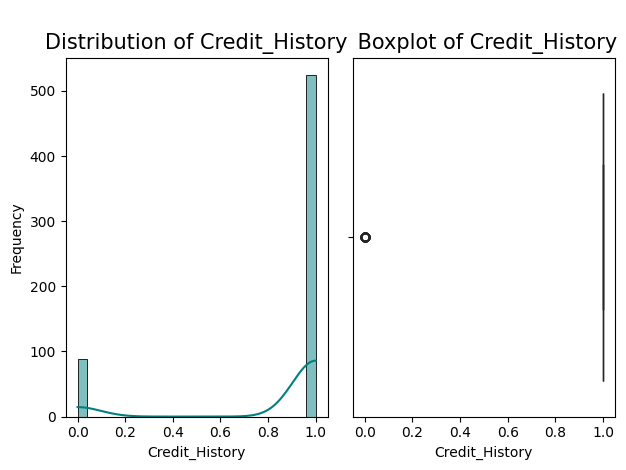

Credit_History is fairly symmetric


In [42]:
# 5. Credit_History

numerical_features_distribution(copied, 'Credit_History')

#### **Credit History**

1. (0.0 or 1.0)
This feature indicates whether an applicant has a good credit history (1 = good, 0 = bad).

2. Heavily Left-Skewed (Skewness = -1.85)
Since most values are 1.0, the distribution is left-skewed — the bulk is concentrated at the higher end.
The minority group (with 0.0) pulls the distribution left.
<br>
Why Credit_History is Important :
Credit_History is extremely predictive for loan approval decisions in most banking datasets. Applicants with a history of paying back loans are much more likely to get approved.

| Feature Type | Observation | Implication|
|--------------|--------------|-----------|
| Numeric Features| Most are highly skewed while very few are fairly symmetrical| These long tails can distort algorithms sensitive to scale like KNN, linear regression.|
| Applicants Income| Very highly skewed| This may indicate the presence of outliers|
| Coapplicant Income| Also highly skewed but not as much as Applicant's income| This may indicate the presence of outliers|
| Loan Amount| Skewness is getting low but still moderately high|This may indicate an Important Predictor|
| Loan Amount Term| This is negative skewness| This shows that the mean is less than the median and shows that the distribution is fairly symmetrical|
|Credit History| This is also a fairly negative skewness| It can be an important predictor

#### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

In [43]:
copied.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [44]:
# Let's analyse education first.
copied['Education'].head()
copied['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

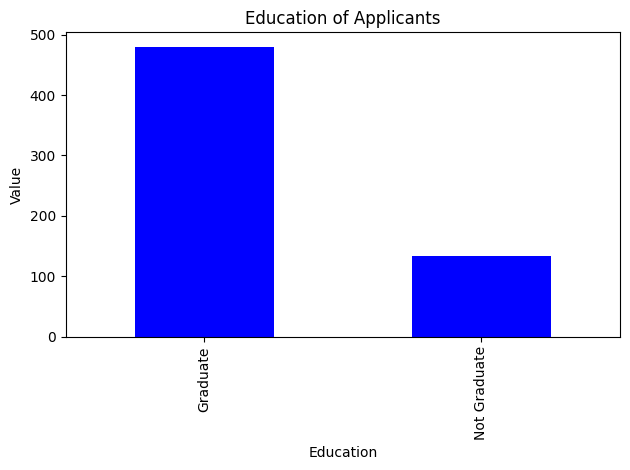

In [45]:
copied['Education'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Education')
plt.ylabel('Value')
plt.title('Education of Applicants')
plt.tight_layout()

In [46]:
education = copied['Education'].value_counts()

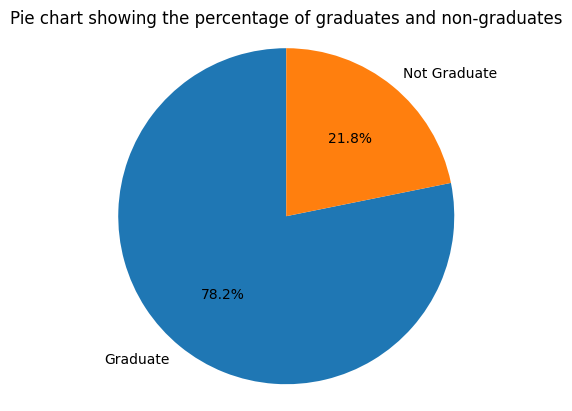

In [47]:
plt.pie(education, labels=education.index, autopct='%1.1f%%',startangle=90)
plt.title('Pie chart showing the percentage of graduates and non-graduates')
plt.axis('equal')
plt.show()


It can be seen from our visualization that the percentage of graduates in the applicants is more than twice that of the non-graduates.

Insights:
1. Majority of Applicants are Graduates
<br>
Over 77% of home loan applicants are graduates.
Indicates that the applicant pool is skewed toward individuals with higher education qualifications.
2. Education level could influence income levels, job type, and financial literacy — which in turn may impact:
Loan approval
Loan amount requested
Repayment behavior

In [48]:
# Let's group them with applicantincome

educ = copied.groupby('Education').agg({'ApplicantIncome':'sum'})
educ

,ApplicantIncome
Education,
Graduate,2811568
Not Graduate,506156


Insight:
<br>
    Graduates generates more income in total, education increases the chances of a good job which may tend to influence their loan approval status.

In [49]:
edu_info = copied.groupby('Education')['ApplicantIncome'].describe()
edu_info

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,480.0,5857.433333,6739.797954,150.0,2998.75,4000.0,6068.75,81000.0
Not Graduate,134.0,3777.283582,2237.081586,210.0,2583.00,3357.5,4333.00,18165.0


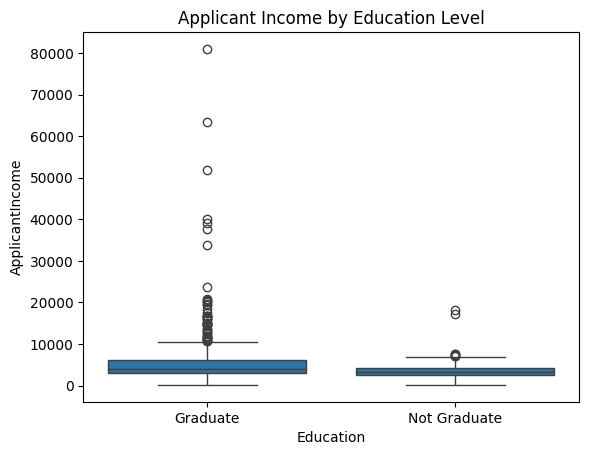

In [50]:
# Let's show the boxplot comparison of education and Applicant's Income

sns.boxplot(data=copied, x='Education', y='ApplicantIncome')
plt.title('Applicant Income by Education Level')
plt.show()


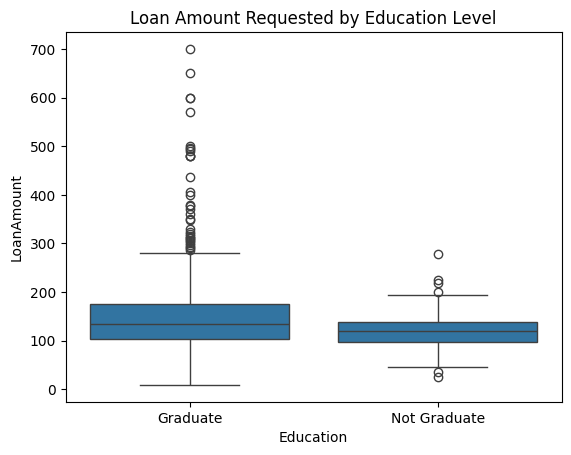

In [51]:
# Let's show the boxplot comparison of education and loan amount
sns.boxplot(data=copied, x='Education', y='LoanAmount')
plt.title('Loan Amount Requested by Education Level')
plt.show()


In [52]:
# Let's analyse employment status

copied.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [53]:
copied['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [54]:
# Let's check the percentage of the self-employed are graduates and those that are non-graduate

Employment_status = copied.groupby('Self_Employed').agg({'Education':'count'})
Employment_status

,Education
Self_Employed,
No,532
Yes,82


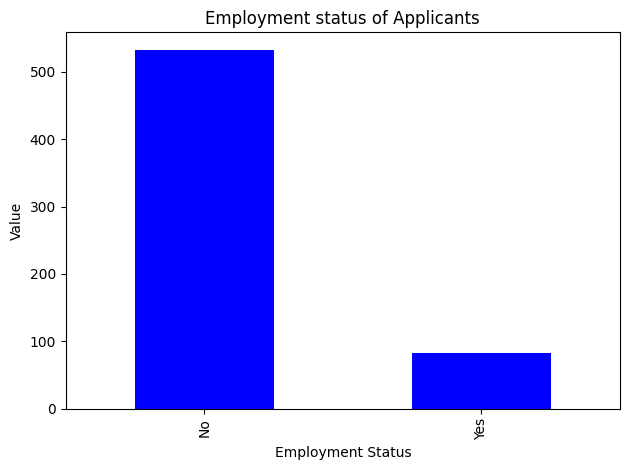

In [55]:
copied['Self_Employed'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Employment Status')
plt.ylabel('Value')
plt.title('Employment status of Applicants')
plt.tight_layout()

In [56]:
employment = copied['Self_Employed'].value_counts()

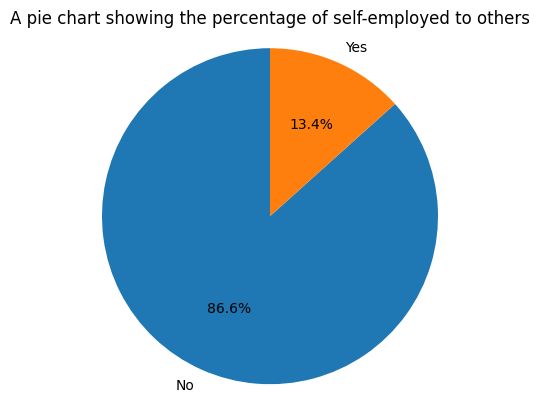

In [57]:
plt.pie(employment, labels=employment.index, autopct='%1.1f%%',startangle=90)
plt.title('A pie chart showing the percentage of self-employed to others')
plt.axis('equal')
plt.show()

Insights:
1. Majority of Applicants are Salaried or Not Self-Employed
Almost 90% of the applicants are not self-employed.

2. Self-Employed Applicants are a Minority
Only 10% are self-employed.

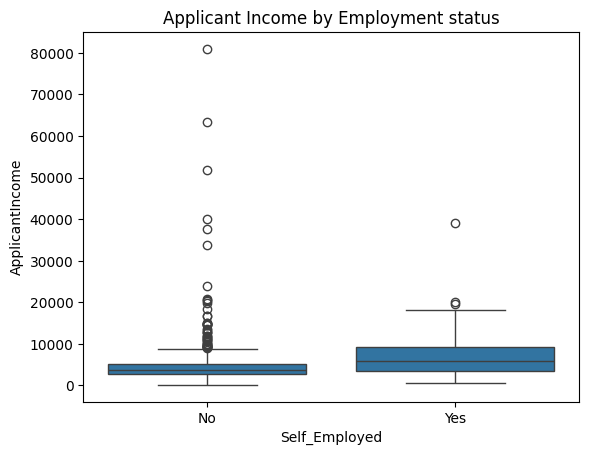

In [58]:
# Let's show the boxplot comparison of self-employed and Applicant's Income

sns.boxplot(data=copied, x='Self_Employed', y='ApplicantIncome')
plt.title('Applicant Income by Employment status')
plt.show()

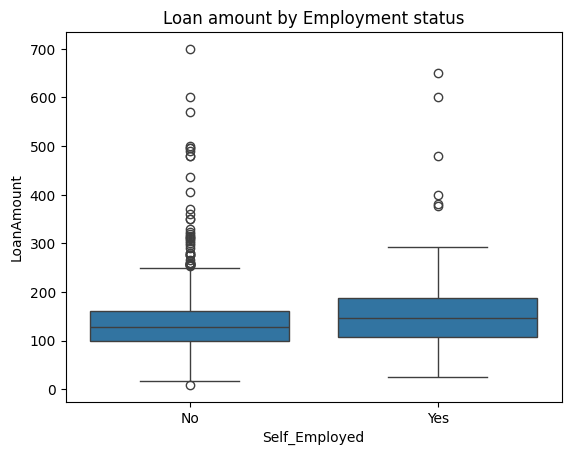

In [59]:
# Let's show the boxplot comparison of self-employed and Applicant's Income

sns.boxplot(data=copied, x='Self_Employed', y='LoanAmount')
plt.title('Loan amount by Employment status')
plt.show()

In [60]:
# Let's analyse property area

copied.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [61]:
copied['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

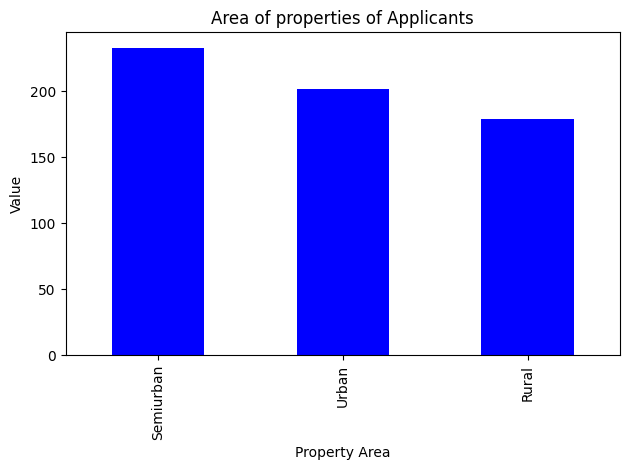

In [62]:
# Let's visualize

copied['Property_Area'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Property Area')
plt.ylabel('Value')
plt.title('Area of properties of Applicants')
plt.tight_layout()

In [64]:
property = copied['Property_Area'].value_counts()

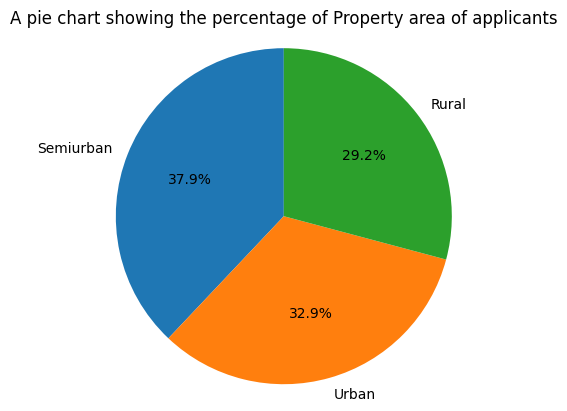

In [66]:
plt.pie(property, labels=property.index, autopct='%1.1f%%',startangle=90)
plt.title('A pie chart showing the percentage of Property area of applicants')
plt.axis('equal')
plt.show()

#### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

In [67]:
copied.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [68]:
# But since we don't have a loan status , let's do some feature engineering



copied['Loan_Status'] = np.random.choice([0, 1], size=len(copied))


In [69]:
copied.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0


In [72]:
def trivariate_plot(copied, x_col, y_col, hue_col):
    

    # plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=copied, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

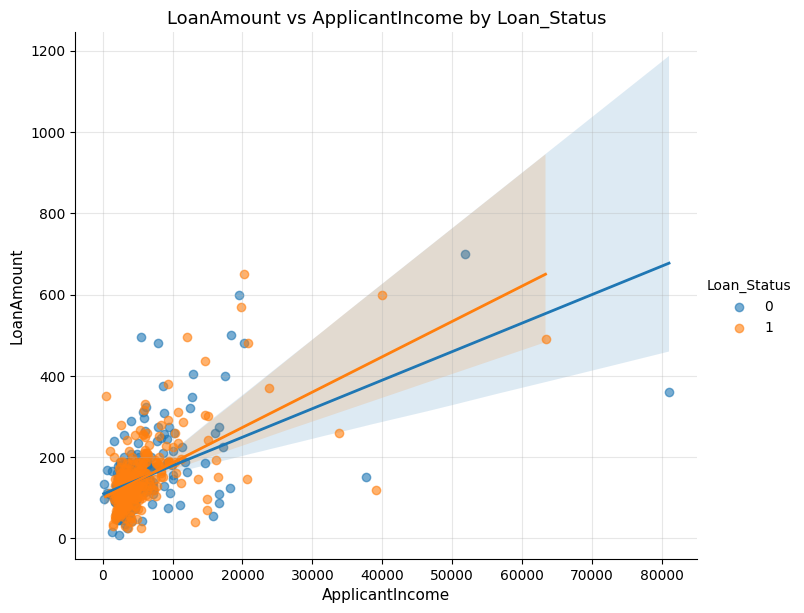

In [73]:
# Example: explore alcohol vs density by wine quality category
trivariate_plot(copied, 'ApplicantIncome', 'LoanAmount', 'Loan_Status')

1. Positive Correlation Exists
<br>
There is a general upward trend between ApplicantIncome and LoanAmount for both approved (Loan_Status = 1) and not approved (Loan_Status = 0) loans.
<br>
As applicant income increases, the requested loan amount tends to increase as well — this is expected behavior.
<br>
2. Loan Approval Is More Common in Lower to Mid-Income Ranges
Most of the approved loans (orange dots) are clustered where:
<br>
ApplicantIncome is between 2,000 – 10,000, and
LoanAmount is between 50 – 250.
This suggests that applicants with moderate income levels are more likely to get approved.



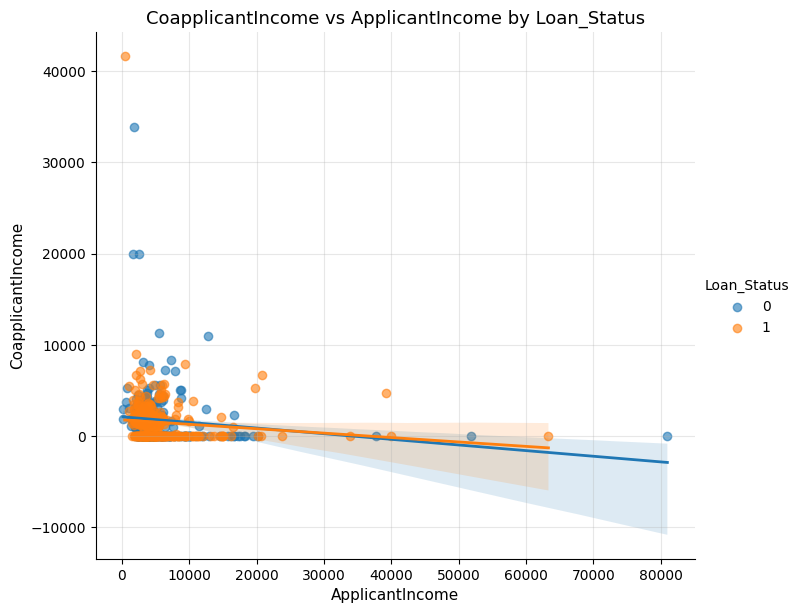

In [74]:
# Example: explore alcohol vs density by wine quality category
trivariate_plot(copied, 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status')

Key Insights:
1. High Applicant Income is not equal to High Coapplicant Income
Most applicants with high incomes have little to no coapplicant income.
Inversely, low applicant incomes sometimes have high coapplicant income — likely when spouses or family members contribute.
2. Approved Loans (Orange) Cluster in Lower to Mid Applicant Incomes
Approved applications are densely concentrated in the range:
ApplicantIncome: ~2,000 to 10,000
CoapplicantIncome: 0 to ~5,000
This suggests dual-income families with moderate earnings have higher approval rates.
3. High Applicant Incomes Alone Do Not Guarantee Approval
There are rejected applications (blue dots) even at ApplicantIncome > 50,000 with zero coapplicant income.
These applicants may have been denied due to other risk factors (e.g., poor credit, high loan amount, or self-employed status).
4. Slight Negative Regression Trend


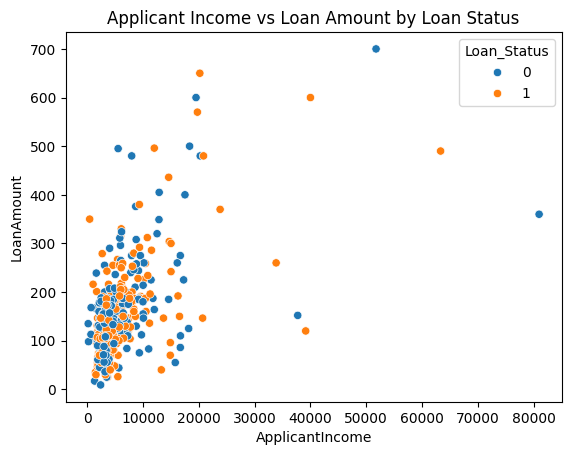

In [75]:
sns.scatterplot(data=copied, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Applicant Income vs Loan Amount by Loan Status')
plt.show()


#### Task 2.5: Identify trends, anomalies, and patterns that could impact loan outcomes.

Based on my analysis of the dataset above, these are the trends, patterns ,and anomalies I noticed.

Key Trends & Patterns Impacting Loan Outcomes :
1. Credit History is the Strongest Predictor
Majority of approved loans have a Credit_History of 1.0.
Implication:
Applicants with no or poor credit history (0.0 or missing) are less likely to get approved, despite high income.
2. Applicant and Coapplicant Income Are Highly Skewed
ApplicantIncome Skewness: 8.44, Kurtosis: 103.13 ,Very high outliers (up to 72,529).
CoapplicantIncome Skewness: 4.25, Kurtosis: 30.19 , Moderate outliers.

3. Loan Amount is Skewed :
Insight:
Large loan amounts without strong income or credit backing are often rejected.
Approved applicants request loans aligned with income levels.
4. Education & Employment Status Influence Trends :
Education:
Graduates = 77%, Not Graduates = 23%
While not directly linked to approval yet, graduates may be seen as more creditworthy(Often the fact of life, they are always more likely to get approved for loans than non-graduates.).

Anomaly Detected
1. High-Income Rejections
Some applicants with very high income are still rejected.
This implies:
High income isn’t enough , credit history and loan amount matter more based on the information obtained from this dataset.
